In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
im = cv2.imread('elephant.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [4]:
print(im.shape)

l = im.shape[0]*im.shape[1]
print(l)

(330, 500, 3)
165000


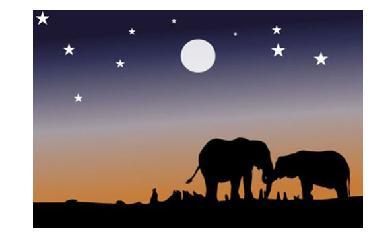

In [172]:
plt.imshow(im)
plt.axis('off')
plt.show()

In [173]:
all_pixels = im.reshape(l, 3)
print(all_pixels.shape)

(165000, 3)


In [174]:
from sklearn.cluster import KMeans

In [229]:
dominant_colors = 6
km = KMeans(n_clusters=dominant_colors)

km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [230]:
centers = km.cluster_centers_
print(centers)

[[ 37.03439455  34.2179063   63.30582511]
 [160.00454853 144.07559889 144.67003336]
 [  1.48037426   0.82862605   1.15098056]
 [ 92.93035099  90.04814245 114.77474903]
 [189.09481605 132.32050039  82.98019665]
 [232.70848846 232.40022338 236.70439315]]


In [231]:
centers = np.array(centers,dtype='uint8')
print(centers)

[[ 37  34  63]
 [160 144 144]
 [  1   0   1]
 [ 92  90 114]
 [189 132  82]
 [232 232 236]]


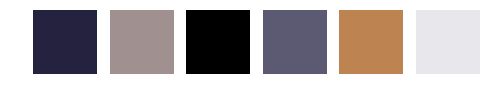

In [232]:
i = 1

colors = []

plt.figure(0,figsize=(8,2))

for each_col in centers:
    plt.subplot(1,dominant_colors,i)
    plt.axis('off')
    
    colors.append(each_col)
    i+=1
    
    a = np.zeros((100,100,3),dtype = 'uint8')
    a[:,:,:] = each_col
    
    plt.imshow(a)
    
plt.show()
    

## Segmenting our original image

In [233]:
new_image = np.zeros((l,3),dtype='uint8')
print(new_image.shape)

(165000, 3)


In [234]:
colors

[array([37, 34, 63], dtype=uint8),
 array([160, 144, 144], dtype=uint8),
 array([1, 0, 1], dtype=uint8),
 array([ 92,  90, 114], dtype=uint8),
 array([189, 132,  82], dtype=uint8),
 array([232, 232, 236], dtype=uint8)]

In [235]:
km.labels_

array([0, 0, 0, ..., 2, 2, 2])

In [236]:
for i in range(new_image.shape[0]):
    new_image[i] = colors[km.labels_[i]]
    

new_image = new_image.reshape((im.shape))

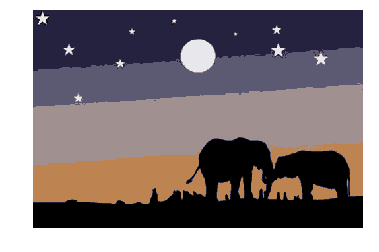

In [237]:
plt.imshow(new_image)
plt.axis('off')
plt.show()

## Homework

In [238]:
elphnt = np.array(new_image).reshape((l,3))
colors = np.array(colors)

In [239]:
sum_rows = [np.sum(x) for x in colors]
elephant_color_index = sum_rows.index(min(sum_rows))
print(elephant_color_index)

2


In [240]:
for i in range(elphnt.shape[0]):
    if not np.array_equal(elphnt[i], colors[elephant_color_index]):
        elphnt[i] = [255,255,255]

In [241]:
elphnt = elphnt.reshape((im.shape))

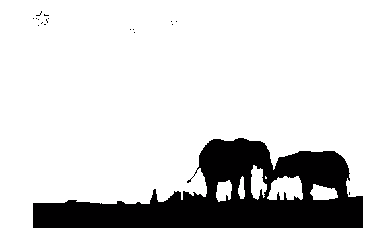

In [242]:
plt.imshow(elphnt)
plt.axis('off')
plt.show()